# DATA ANALYSIS PROCESSES

The data analysis process involves several key steps that guide you from understanding the problem to communicating the results. Here's a simple workflow:

**1. Define the Problem and Goals:**
Clearly define the problem you are trying to solve and establish the goals of the analysis.

**2. Data Collection:**
Identify and gather the relevant data. This could involve retrieving data from databases, collecting new data through surveys or experiments, or scraping data from the web. Ensure that the data collected is appropriate for the analysis.

**3. Data Cleaning:**
Handle missing data, remove duplicates, and correct any errors or inconsistencies in the data. Transform the data into a consistent format, and deal with outliers if necessary.

**4. Data Exploration:**
Conduct exploratory data analysis (EDA) to understand the structure, patterns, and relationships within the data.
Use visualizations (like histograms, scatter plots), and correlation analysis to summarize the data.

**5. Data Modeling:**
Select appropriate models or algorithms based on the analysis goals (e.g., regression, classification, clustering). Train the models on your data and validate their performance using techniques like cross-validation.

**6.Data Interpretation:**
Analyze the results from the models and explore their implications. Draw insights, make decisions, and identify trends or patterns that answer the initial problem or question.

**7.Data Visualization:**
Create visualizations to represent the findings in a clear and understandable way. Use charts, graphs, and dashboards to convey the key insights to stakeholders.

**8.Communicate Results:**
Prepare a report or presentation that summarizes the analysis, methodologies, findings, and recommendations. Tailor the communication to your audience, ensuring that the results are accessible and actionable.

# EXPLORING TITANIC DATASET


## Import Libraries


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Import Dataset


In [3]:
df=pd.read_csv('TitanicData.csv')

### Checking the shape of orignal dataset.


In [4]:
df.shape

(418, 12)

### Printing first five rows of given dataset.

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Printing last five rows of given dataset.

In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


### info() function gives the null count and data types of all the rows.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### The graph given below shows the missing values in 'Age', 'Fare' and 'Cabin' columns.

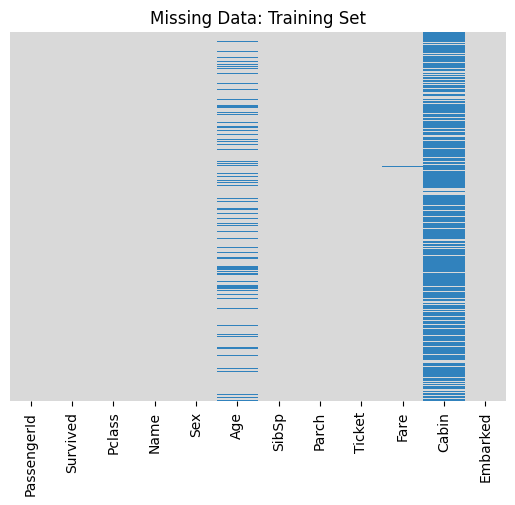

In [9]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [11]:
df['Age'].isnull().sum()

86

In [12]:
df.Age[0:5]

0    34.5
1    47.0
2    62.0
3    27.0
4    22.0
Name: Age, dtype: float64

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

#### As Age column has only 86 null values, so we can impute mean values.

In [16]:
imp = SimpleImputer(strategy='mean')
df['Age'] = imp.fit_transform(df['Age'].values.reshape(-1, 1) )

df['Age'].isnull().sum()


0

#### Removing unnecessary columns. This will help in model building.

In [17]:
remove_cols=['Name', 'Ticket','Cabin','PassengerId']
df.drop(remove_cols, axis = 1, inplace = True)

In [18]:
df.shape

(418, 8)

#### Label Encoder converts the columns of object datatype into integer datatype.

In [19]:
le = LabelEncoder() 
df['Sex']= le.fit_transform(df['Sex']) 
df['Embarked'] = le.fit_transform(df['Embarked'])

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


In [21]:
df.dropna(inplace=True)

In [23]:
df.shape

(417, 8)

#### This shows the first five Rows of Pre-processed dataset. 

In [24]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


## Visualization

### Relational plot between Age and Fare

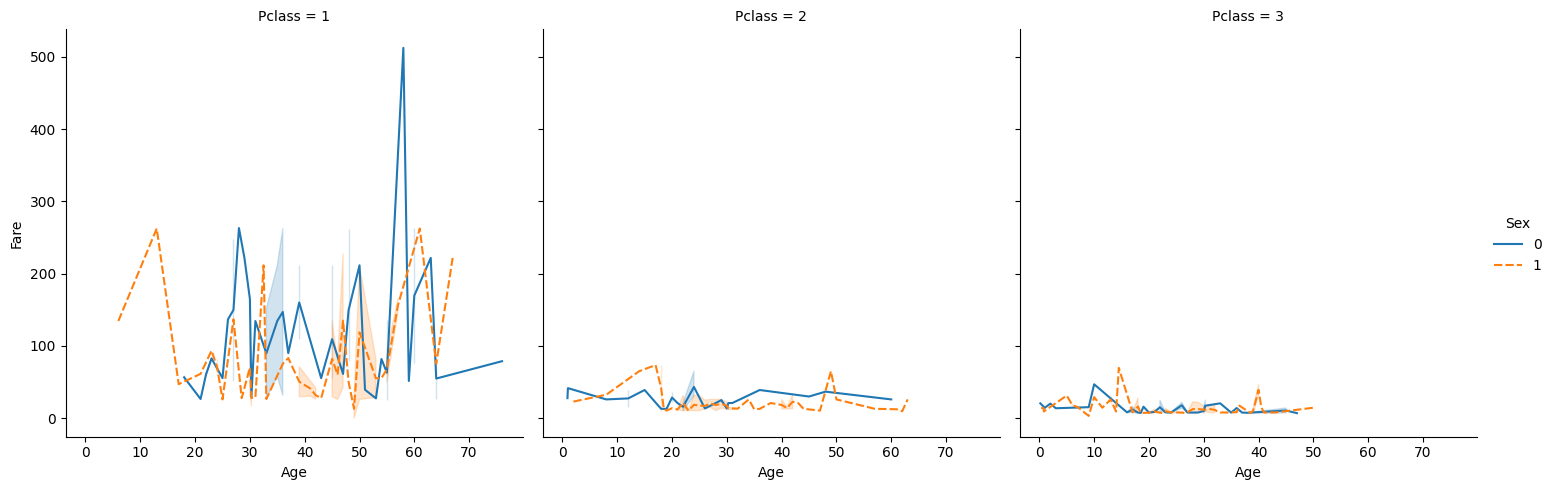

In [26]:
sns.relplot(x="Age", y="Fare", col="Pclass", hue="Sex", style="Sex",kind="line", data=df) 
plt.show()

#### Boxplot for the people who survived according to Age

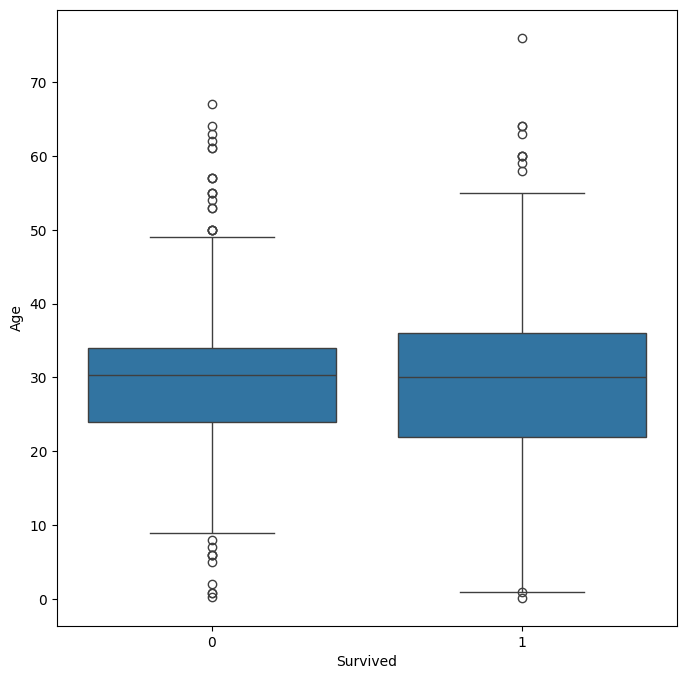

In [28]:
plt.figure(figsize=(8,8))
sns.boxplot(x="Survived", y="Age", data=df)
plt.show()

#### Countplot for the number of people who survived from both genders.

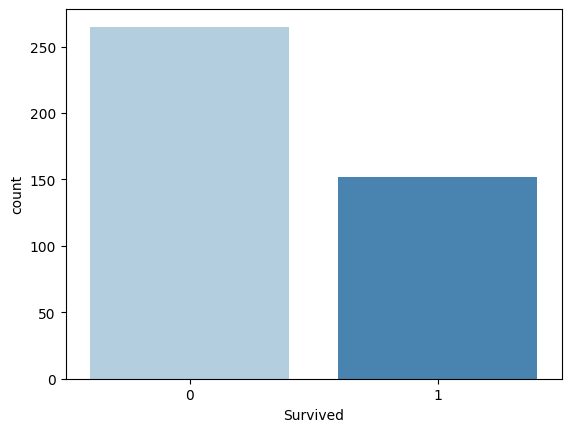

In [29]:
sns.countplot(x="Survived", data=df, palette="Blues");
plt.show()